In [1]:
from fastai.basics import *

In [2]:
import ipywidgets as widgets

In [3]:
from matplotlib import pyplot as plt
import PIL
%matplotlib inline

In [4]:
import os

In [5]:
slider = widgets.IntSlider()

In [6]:
slider

IntSlider(value=0)

In [7]:
slider.value

0

In [43]:
! wget https://images.hellogiggles.com/uploads/2018/03/21041247/puppies.jpg

--2019-03-01 00:18:05--  https://images.hellogiggles.com/uploads/2018/03/21041247/puppies.jpg
Resolving images.hellogiggles.com (images.hellogiggles.com)... 52.85.105.173, 52.85.105.31, 52.85.105.109, ...
Connecting to images.hellogiggles.com (images.hellogiggles.com)|52.85.105.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6333277 (6.0M) [image/jpeg]
Saving to: ‘puppies.jpg’

puppies.jpg         100%[===================>]   6.04M  --.-KB/s    in 0.1s    

2019-03-01 00:18:05 (48.2 MB/s) - ‘puppies.jpg’ saved [6333277/6333277]



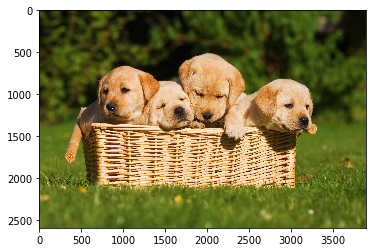

In [9]:
plt.imshow(PIL.Image.open("puppies.jpg"))

In [80]:
! wget https://images.hellogiggles.com/uploads/2018/03/21041247/puppies.jpg

--2019-03-01 00:36:15--  https://images.hellogiggles.com/uploads/2018/03/21041247/puppies.jpg
Resolving images.hellogiggles.com (images.hellogiggles.com)... 52.85.89.64, 52.85.89.151, 52.85.89.216, ...
Connecting to images.hellogiggles.com (images.hellogiggles.com)|52.85.89.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6333277 (6.0M) [image/jpeg]
Saving to: ‘puppies.jpg’

puppies.jpg         100%[===================>]   6.04M  31.8MB/s    in 0.2s    

2019-03-01 00:36:15 (31.8 MB/s) - ‘puppies.jpg’ saved [6333277/6333277]



In [93]:
from IPython.display import clear_output
def action_on_click(b):
    os.remove("puppies.jpg")
    clear_output()
    text = widgets.Text("There is no more puppy.", layout=widgets.Layout(width="500px"))
    display(text)
    refresh_button = widgets.Button(description="Unless you want another one...", layout=widgets.Layout(width="500px"))
    refresh_button.on_click(lambda b: clear_output())
    refresh_button.on_click(lambda b: loop())
    display(refresh_button)

def loop():
    out = widgets.Output()
    # with out:
    try:
        file = open("puppies.jpg", "rb")
    except:
        content = requests.get("https://images.hellogiggles.com/uploads/2018/03/21041247/puppies.jpg").content
        with open("puppies.jpg", "w+b") as f:
            f.write(content)
        file = open("puppies.jpg", "rb")
        
    image = file.read()
    img = widgets.Image(
        value=image,
        format='jpg',
        width=200,
        height=100,
    )
    button = widgets.Button(description="Delete", layout=widgets.Layout(width="200px"))
    button.on_click(action_on_click)
    final = widgets.VBox([img, button])
    display(final)
    
loop()